<a href="https://colab.research.google.com/github/Kittipat77/Consumer-Behavior-Analysis-of-Fruit-Consumption-and-Fruit-Based-Products/blob/main/Consumer-Behavior-Analysis-of-Fruit-Consumption-and-Fruit-Based-Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#พฤติกรรมการบริโภคผลไม้และผลิตภัณฑ์จากผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์

**กลุ่มอุตสาหกรรมการเกษตร**
* นายสุรเชษฐ์ แทนกุลเจริญ
* นายกิตติพัฒน์ สุวรรณ
* นายสิรกานต์ ธนบุญสมบัติ (ผู้ประสานงานกลุ่ม)

#Importing necessary packages and loading data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
!wget -q 'https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf'
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New', size=16)

In [ ]:
data = pd.read_csv('https://drive.google.com/uc?id=1EOv1fO5M8tkD3iGEApiu5Xe0n5OFyGhJ')
data.drop('Timestamp', axis='columns', inplace=True)
data

,รหัสนักศึกษา 2 ตัวแรก,คุณศึกษาอยู่คณะอะไร,เพศ,คุณรับประทานผลไม้หรือไม่,เหตุผลที่คุณไม่รับประทานผลไม้ (เลือกได้มากกว่า 1 ข้อ),ปัจจัยต่อไปนี้มีผลต่อการซื้อผลไม้ของคุณระดับไหน [รสชาติ],ปัจจัยต่อไปนี้มีผลต่อการซื้อผลไม้ของคุณระดับไหน [ประโยชน์ต่อสุขภาพ],ปัจจัยต่อไปนี้มีผลต่อการซื้อผลไม้ของคุณระดับไหน [ความสดใหม่],ปัจจัยต่อไปนี้มีผลต่อการซื้อผลไม้ของคุณระดับไหน [ความสะอาด],ปัจจัยต่อไปนี้มีผลต่อการซื้อผลไม้ของคุณระดับไหน [ราคา],...,คุณดื่มน้ำผลไม้หรือไม่,เหตุผลที่คุณไม่ดื่มน้ำผลไม้ (เลือกได้มากกว่า 1 ข้อ),คุณชอบดื่มน้ำผลไม้ในรูปแบบใดมากที่สุด,คุณดื่มน้ำผลไม้บ่อยแค่ไหน,"คุณรับประทานทานขนมที่ทำมาจากผลไม้หรือไม่ (เช่น ไอศกรีม, โยเกิร์ต, พาย, ผลไม้อบแห้ง)",เหตุผลที่คุณไม่รับประทานขนมจากผลไม้,คุณชอบรับประทานขนมจากผลไม้ชนิดใดบ้าง (เลือกได้มากสุด 3 ข้อ),คุณชอบรับประทานผลไม้อบแห้งจากผลไม้ชนิดไหนมากที่สุด,คุณชอบรับประทานโยเกิร์ตผลไม้จากผลไม้ชนิดไหนมากที่สุด,คุณชอบรับประทานไอศกรีมผลไม้จากผลไม้ชนิดไหนมากที่สุด
0,64,คณะวิทยาศาสตร์และเทคโนโลยี,หญิง,รับประทาน,NaN,มากที่สุด,มาก,มากที่สุด,มากที่สุด,ปานกลาง,...,ดื่ม,NaN,น้ำผลไม้สด,2-3 ครั้ง/สัปดาห์,รับประทาน,NaN,"เยลลี่/กัมมี่ผลไม้, โยเกิร์ตผลไม้, บิงซูผลไม้",สตรอว์เบอร์รี,มะพร้าว,สตรอว์เบอร์รี
1,64,คณะวิทยาศาสตร์และเทคโนโลยี,ชาย,รับประทาน,NaN,มากที่สุด,มาก,มาก,มากที่สุด,ปานกลาง,...,ดื่ม,NaN,น้ำผลไม้กล่อง,2-3 ครั้ง/สัปดาห์,รับประทาน,NaN,"ผลไม้อบแห้ง, เยลลี่/กัมมี่ผลไม้, โยเกิร์ตผลไม้",มะม่วง,บลูเบอร์รี,สตรอว์เบอร์รี
2,64,คณะวิทยาศาสตร์และเทคโนโลยี,ชาย,รับประทาน,NaN,ปานกลาง,ปานกลาง,มาก,มาก,มากที่สุด,...,ดื่ม,NaN,ผลไม้ที่มากับชาเขียว เช่น ชาเขียวสตอเบอรี่,1 ครั้ง/สัปดาห์,รับประทาน,NaN,"ไอศกรีมผลไม้, บิงซูผลไม้, ขอแค่อร่อยครับ",อร่อยก็กินหมดอ่ะครับ,อันนี้ยังเคยลองแค่สตอเบอรี่,ทั้งหมดที่ว่ามาแหละครับ ถ้ามันอร่อย
3,64,คณะวิทยาศาสตร์และเทคโนโลยี,หญิง,รับประทาน,NaN,มากที่สุด,มากที่สุด,มากที่สุด,มากที่สุด,มาก,...,ดื่ม,NaN,น้ำผลไม้ปั่น,2-3 ครั้ง/สัปดาห์,รับประทาน,NaN,"โยเกิร์ตผลไม้, ไอศกรีมผลไม้, บิงซูผลไม้",สตรอว์เบอร์รี,มะพร้าว,สตรอว์เบอร์รี
4,64,คณะวิทยาศาสตร์และเทคโนโลยี,LGBTQ+,รับประทาน,NaN,มากที่สุด,ปานกลาง,มากที่สุด,มากที่สุด,มาก,...,ดื่ม,NaN,น้ำผลไม้ปั่น,2-3 ครั้ง/สัปดาห์,รับประทาน,NaN,"เยลลี่/กัมมี่ผลไม้, โยเกิร์ตผลไม้, ไอศกรีมผลไม้",ไม่รับประทานผลไม้อบแห้ง,สตรอว์เบอร์รี,มะนาว
5,64,คณะวิทยาศาสตร์และเทคโนโลยี,ชาย,รับประทาน,NaN,มาก,มากที่สุด,มาก,มากที่สุด,ปานกลาง,...,ดื่ม,NaN,น้ำผลไม้กล่อง,น้อยกว่า 1 ครั้ง/สัปดาห์ (ไม่ได้ดื่มประจำทุกสั...,รับประทาน,NaN,"เครปผลไม้, โยเกิร์ตผลไม้, ไอศกรีมผลไม้",ไม่รับประทานผลไม้อบแห้ง,สตรอว์เบอร์รี,เมลอน
6,62,คณะวิทยาศาสตร์และเทคโนโลยี,ชาย,รับประทาน,NaN,น้อย,ปานกลาง,น้อย,มาก,ปานกลาง,...,ดื่ม,NaN,น้ำผลไม้กล่อง,มากกว่า 3 ครั้ง/สัปดาห์,ไม่รับประทาน,น้ำตาลสูง,NaN,NaN,NaN,NaN
7,63,คณะวิทยาศาสตร์และเทคโนโลยี,หญิง,รับประทาน,NaN,ปานกลาง,มาก,มากที่สุด,มากที่สุด,น้อย,...,ดื่ม,NaN,น้ำผลไม้ปั่น,มากกว่า 3 ครั้ง/สัปดาห์,รับประทาน,NaN,"ผลไม้อบแห้ง, เยลลี่/กัมมี่ผลไม้, บิงซูผลไม้",บ๊วย,มะพร้าว,มะนาว
8,61,คณะวิทยาศาสตร์และเทคโนโลยี,หญิง,รับประทาน,NaN,มากที่สุด,ปานกลาง,มากที่สุด,มากที่สุด,ปานกลาง,...,ดื่ม,NaN,น้ำผลไม้สด,1 ครั้ง/สัปดาห์,รับประทาน,NaN,"ผลไม้อบแห้ง, เยลลี่/กัมมี่ผลไม้, บิงซูผลไม้",สตรอว์เบอร์รี,สตรอว์เบอร์รี,มะนาว
9,65,คณะพาณิชยศาสตร์และการบัญชี,หญิง,รับประทาน,NaN,มาก,มาก,มาก,มากที่สุด,มากที่สุด,...,ดื่ม,NaN,น้ำผลไม้สด,1 ครั้ง/สัปดาห์,ไม่รับประทาน,ชอบผลไม้สดมากกว่า,NaN,NaN,NaN,NaN


#ตอนที่ 1 : ข้อมูลทั่วไป

สัดส่วนของผู้ตอบแบบสอบถามจำแนกตามชั้นปี

In [ ]:
academic_year = data['รหัสนักศึกษา 2 ตัวแรก'].value_counts().sort_index(ascending=False)
academic_year = academic_year.rename({65:'1', 64:'2', 63:'3', 62:'4', 61:'5'})

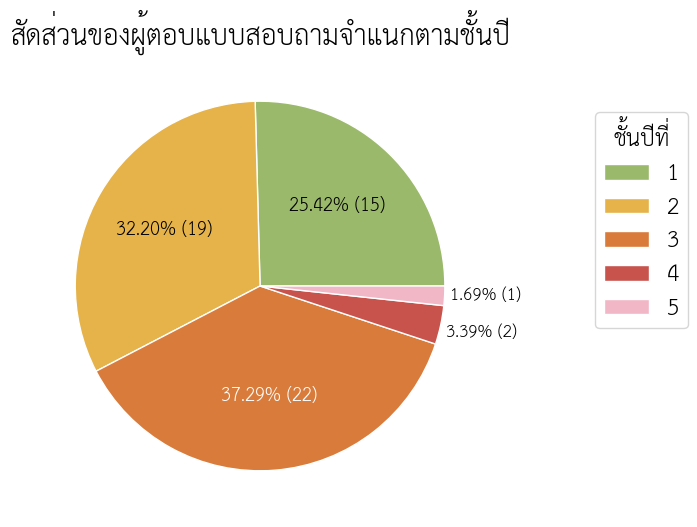

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(academic_year, labels=academic_year.index, autopct=lambda x: f'{x:.2f}% ({round(x*sum(academic_year)/100)})',
                                   textprops={'color': 'white'}, wedgeprops={'edgecolor': 'white', 'linewidth': 1},
                                   colors=['#9BB96B','#E5B34A','#D97C3B','#C8534C','#F1B7C6'])

for autotext in autotexts:
    autotext.set_fontsize(13)
    autotext.set_color('black')

autotexts[2].set_color('white')
autotexts[3].set_position((1.2, -0.25))
autotexts[3].set_fontsize(12)
autotexts[4].set_position((1.22, -0.05))
autotexts[4].set_fontsize(12)

plt.title('สัดส่วนของผู้ตอบแบบสอบถามจำแนกตามชั้นปี')
plt.legend(bbox_to_anchor=(1.45, 0.9), title='ชั้นปีที่')
plt.show()

สัดส่วนของผู้ตอบแบบสอบถามจำแนกตามคณะ

In [ ]:
faculty = data['คุณศึกษาอยู่คณะอะไร'].value_counts().sort_values()
faculty = faculty.rename({
    'คณะศิลปกรรมศาสตร์':'ศิลปกรรมศาสตร์',
    'คณะวิทยาการเรียนรู้และศึกษาศาสตร์':'วิทยาการเรียนรู้และศึกษาศาสตร์',
    'คณะทันตแพทยศาสตร์':'ทันตแพทยศาสตร์',
    'คณะสังคมสงเคราะห์ศาสตร์':'สังคมสงเคราะห์ศาสตร์',
    'คณะรัฐศาสตร์':'รัฐศาสตร์',
    'คณะวิศวกรรมศาสตร์':'วิศวกรรมศาสตร์',
    'คณะสหเวชศาสตร์':'สหเวชศาสตร์',
    'คณะนิติศาสตร์':'นิติศาสตร์',
    'คณะพาณิชยศาสตร์และการบัญชี':'พาณิชยศาสตร์และการบัญชี',
    'คณะศิลปศาสตร์':'ศิลปศาสตร์',
    'คณะวิทยาศาสตร์และเทคโนโลยี':'วิทยาศาสตร์และเทคโนโลยี'
    })

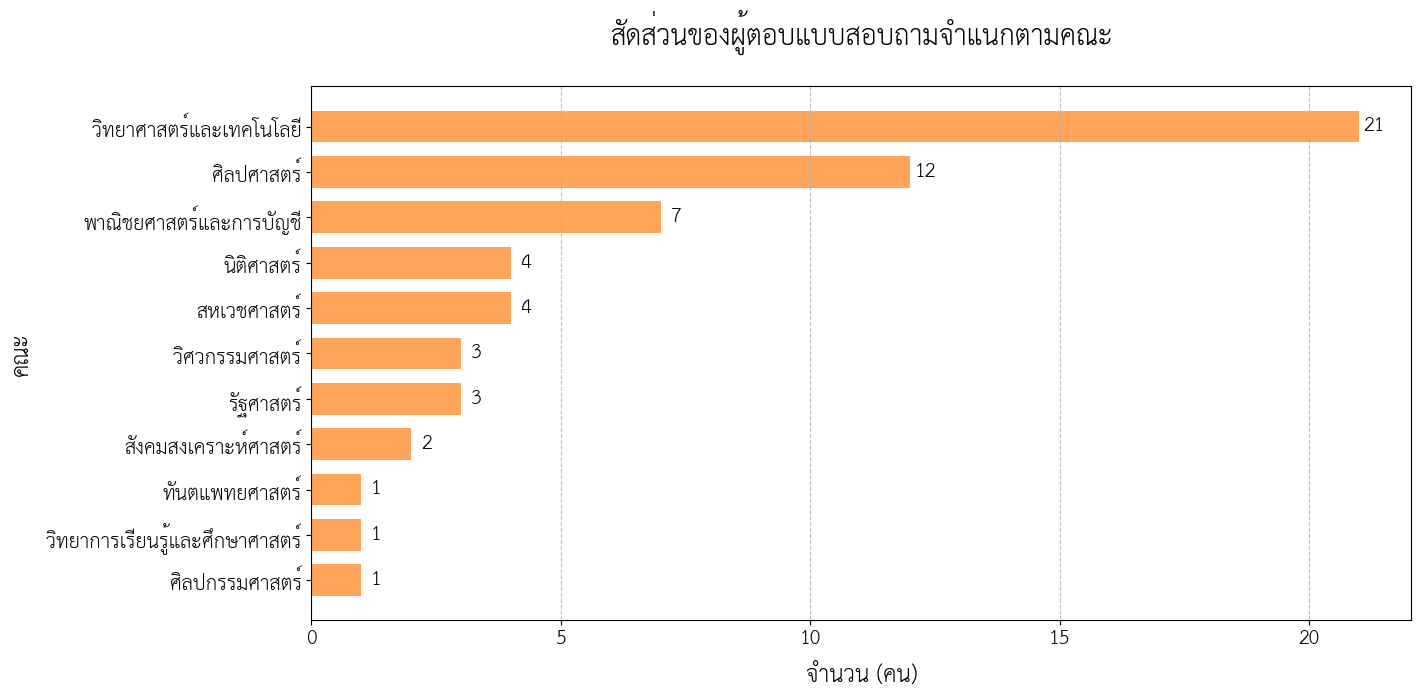

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(faculty.index, faculty, height=0.7, color='#FFA559')
ax.tick_params(axis='both', labelsize=14)
fig.subplots_adjust(right=1.5, top=1)
ax.grid(axis='x', linestyle='--', alpha=0.8)

for i, v in enumerate(faculty):
    ax.text(v+0.3, i, '{:.0f}'.format(v), fontsize=14, ha='center', va='center')

plt.title('สัดส่วนของผู้ตอบแบบสอบถามจำแนกตามคณะ', pad=30)
plt.xlabel('จำนวน (คน)', labelpad=10)
plt.ylabel('คณะ', labelpad=10)
ax.set_xticks([0, 5, 10, 15, 20])
plt.show()

สัดส่วนของผู้ตอบแบบสอบถามจำแนกตามเพศ

In [ ]:
sex = data['เพศ'].value_counts()

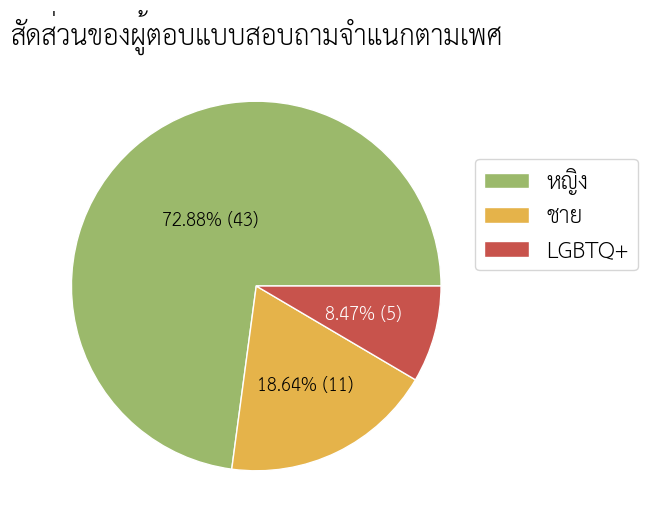

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(sex, labels=sex.index, autopct=lambda x: f'{x:.2f}% ({round(x*sum(sex)/100)})',
                                   textprops={'color': 'white'}, wedgeprops={'edgecolor': 'white', 'linewidth': 1},
                                   colors=['#9BB96B','#E5B34A','#C8534C'])

for autotext in autotexts:
    autotext.set_fontsize(13)
    autotext.set_color('black')

autotexts[2].set_color('white')
autotexts[0].set_position((-0.25, 0.35))

plt.title('สัดส่วนของผู้ตอบแบบสอบถามจำแนกตามเพศ')
plt.legend(bbox_to_anchor=(1.35, 0.8))
plt.show()

#ตอนที่ 2 : การบริโภคผลไม้

การรับประทานผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์

In [ ]:
fruit_consumption = data['คุณรับประทานผลไม้หรือไม่'].value_counts()

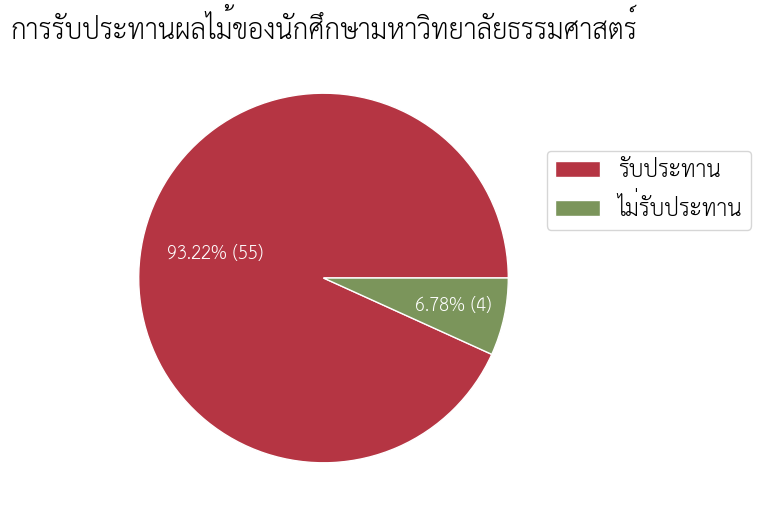

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(fruit_consumption, labels=fruit_consumption.index, autopct=lambda x: f'{x:.2f}% ({round(x*sum(fruit_consumption)/100)})',
                                   textprops={'color': 'white'}, wedgeprops={'edgecolor': 'white', 'linewidth': 1},
                                   colors=['#B53543', '#7B955B'])

for autotext in autotexts:
    autotext.set_fontsize(13)

autotexts[1].set_position((0.7, -0.15))

plt.title('การรับประทานผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์')
plt.legend(bbox_to_anchor=(1.45, 0.8))
plt.show()

เหตุผลของการไม่รับประทานผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์

In [ ]:
fruit_reason = data['เหตุผลที่คุณไม่รับประทานผลไม้ (เลือกได้มากกว่า 1 ข้อ)'].dropna()
fruit_reason = Counter(','.join(fruit_reason).replace(' ','').split(','))
fruit_reason = pd.Series(fruit_reason).sort_values()

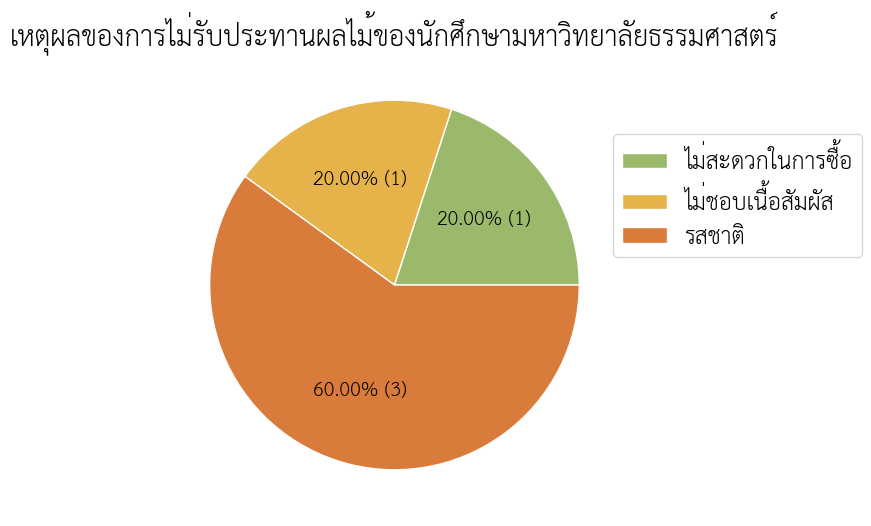

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(fruit_reason, labels=fruit_reason.index, autopct=lambda x: f'{x:.2f}% ({round(x*sum(fruit_reason)/100)})',
                                   textprops={'color': 'white'}, wedgeprops={'edgecolor': 'white', 'linewidth': 1},
                                   colors=['#9BB96B','#E5B34A','#D97C3B','#C8534C'])

for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_color('black')

plt.title('เหตุผลของการไม่รับประทานผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์')
plt.legend(bbox_to_anchor=(0.95, 0.85))
plt.show()

ปัจจัยที่ส่งผลต่อการเลือกซื้อผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์

In [ ]:
factors = data.loc[:, 'ปัจจัยต่อไปนี้มีผลต่อการซื้อผลไม้ของคุณระดับไหน [รสชาติ]':'ปัจจัยต่อไปนี้มีผลต่อการซื้อผลไม้ของคุณระดับไหน [ฤดูกาล]']
factors = factors.rename(columns={
    'ปัจจัยต่อไปนี้มีผลต่อการซื้อผลไม้ของคุณระดับไหน [รสชาติ]': 'รสชาติ',
    'ปัจจัยต่อไปนี้มีผลต่อการซื้อผลไม้ของคุณระดับไหน [ประโยชน์ต่อสุขภาพ]': 'ประโยชน์ต่อสุขภาพ',
    'ปัจจัยต่อไปนี้มีผลต่อการซื้อผลไม้ของคุณระดับไหน [ความสดใหม่]': 'ความสดใหม่',
    'ปัจจัยต่อไปนี้มีผลต่อการซื้อผลไม้ของคุณระดับไหน [ความสะอาด]': 'ความสะอาด',
    'ปัจจัยต่อไปนี้มีผลต่อการซื้อผลไม้ของคุณระดับไหน [ราคา]': 'ราคา',
    'ปัจจัยต่อไปนี้มีผลต่อการซื้อผลไม้ของคุณระดับไหน [ความสะดวกในการซื้อ]': 'ความสะดวกในการซื้อ',
    'ปัจจัยต่อไปนี้มีผลต่อการซื้อผลไม้ของคุณระดับไหน [บรรจุภัณฑ์ / แพคเกจจิ้ง]': 'บรรจุภัณฑ์ / แพคเกจจิ้ง',
    'ปัจจัยต่อไปนี้มีผลต่อการซื้อผลไม้ของคุณระดับไหน [ร้านค้า / ยี่ห้อ]': 'ร้านค้า / ยี่ห้อ',
    'ปัจจัยต่อไปนี้มีผลต่อการซื้อผลไม้ของคุณระดับไหน [ฤดูกาล]': 'ฤดูกาล'
})
factors = factors.replace({'น้อยที่สุด':1, 'น้อย':2, 'ปานกลาง':3, 'มาก':4, 'มากที่สุด':5})
factors_mean = factors.mean().sort_values()

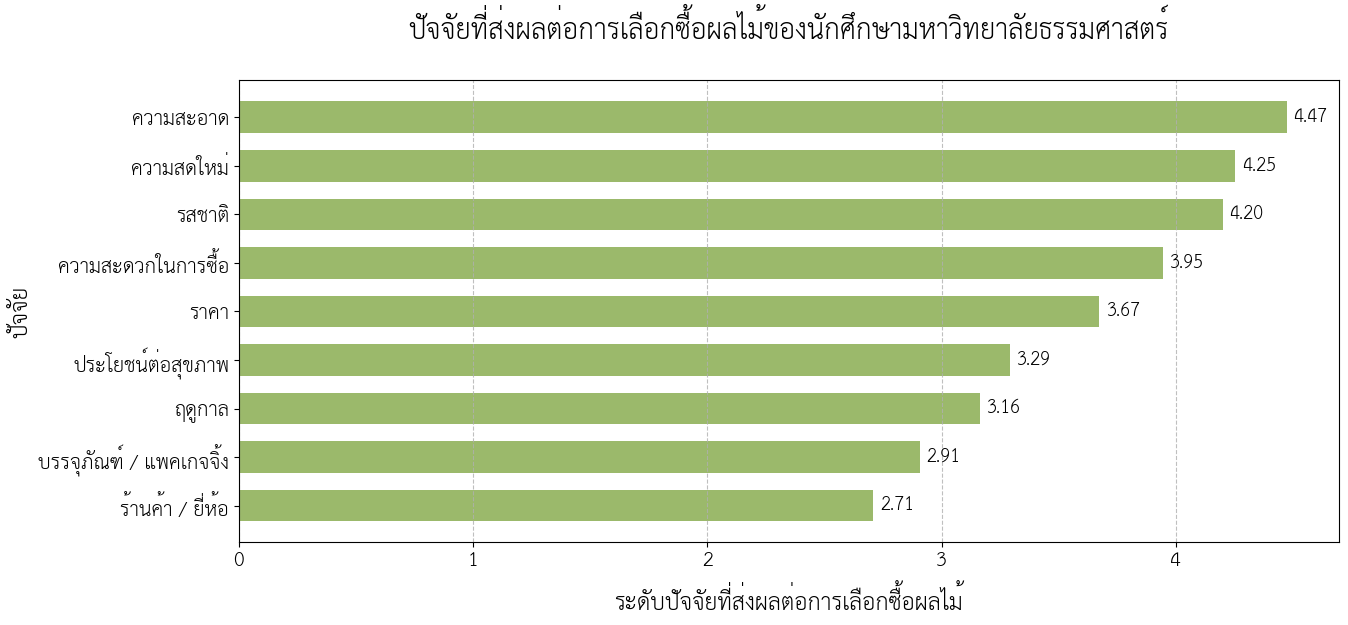

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(factors_mean.index, factors_mean.values, height=0.65, color='#9BB96B')
ax.tick_params(axis='both', labelsize=14)
fig.subplots_adjust(right=1.5)
ax.grid(axis='x', linestyle='--', alpha=0.8)

for i, v in enumerate(factors_mean):
    ax.text(v+0.1, i, '{:.2f}'.format(v), fontsize=13, ha='center', va='center')

plt.title('ปัจจัยที่ส่งผลต่อการเลือกซื้อผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์', pad=30)
plt.xlabel('ระดับปัจจัยที่ส่งผลต่อการเลือกซื้อผลไม้', labelpad=10)
plt.ylabel('ปัจจัย')
plt.show()

สถานที่ในการซื้อผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์

In [ ]:
purchase_location = data['คุณซื้อผลไม้ที่ไหน (เลือกได้มากกว่า 1 ข้อ)'].dropna()
purchase_location = Counter((','.join(purchase_location)).replace(' ','').split(','))
purchase_location = pd.Series(purchase_location).sort_values()
purchase_location = purchase_location.drop('ผมปีนต้นไม้เก็บกิน')

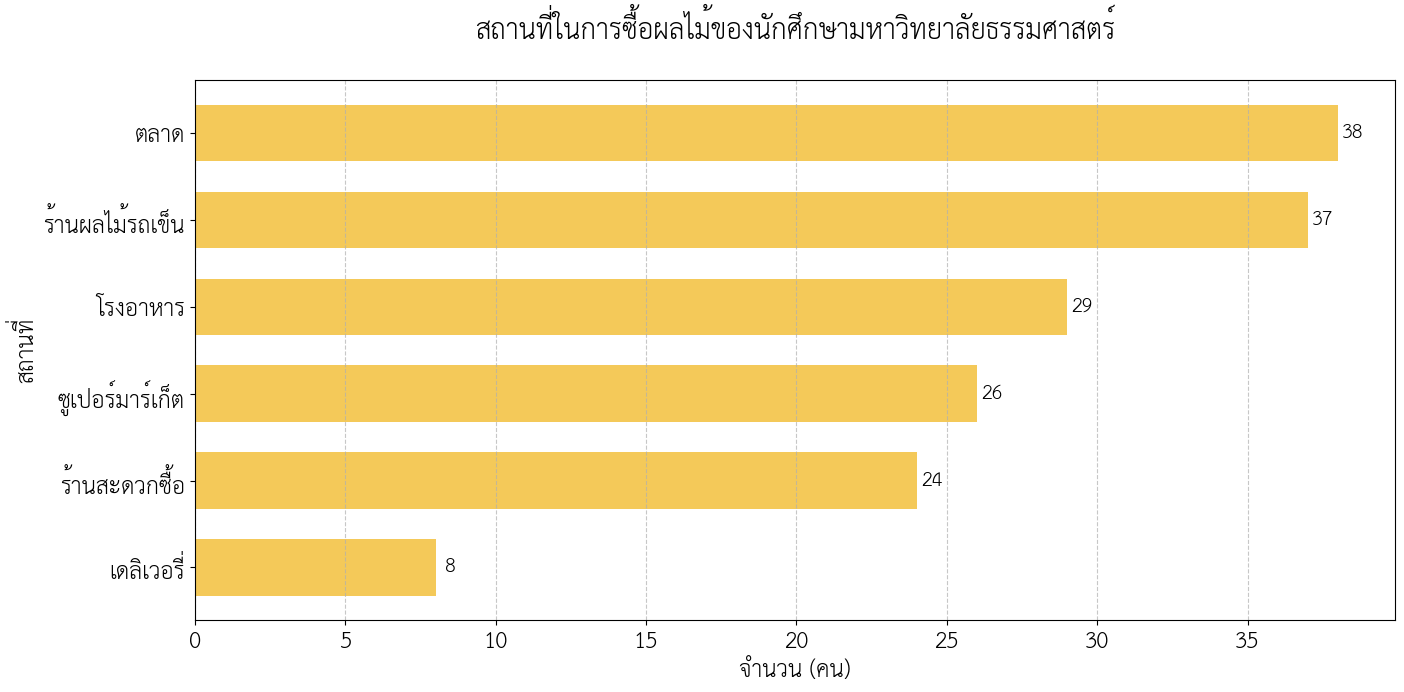

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(purchase_location.index, purchase_location, height=0.65, color='#F4C959')
ax.grid(axis='x', linestyle='--', alpha=0.7)
fig.subplots_adjust(left=0, bottom=0, right=1.5, top=0.9, wspace=0, hspace=0)

for i, v in enumerate(purchase_location):
    ax.text(v+0.5, i, '{:.0f}'.format(v), fontsize=14, ha='center', va='center')

plt.title('สถานที่ในการซื้อผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์', pad=30)
plt.xlabel('จำนวน (คน)')
plt.ylabel('สถานที่')
plt.show()

ความถี่ในการรับประทานผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์

In [ ]:
fruit_frequency = data['คุณรับประทานผลไม้บ่อยแค่ไหน'].value_counts()
fruit_frequency = fruit_frequency.reindex(['น้อยกว่า 1 ครั้ง/สัปดาห์ (ไม่ได้รับประทานประจำทุกสัปดาห์)', '1 ครั้ง/สัปดาห์', '2-3 ครั้ง/สัปดาห์', 'มากกว่า 3 ครั้ง/สัปดาห์'])

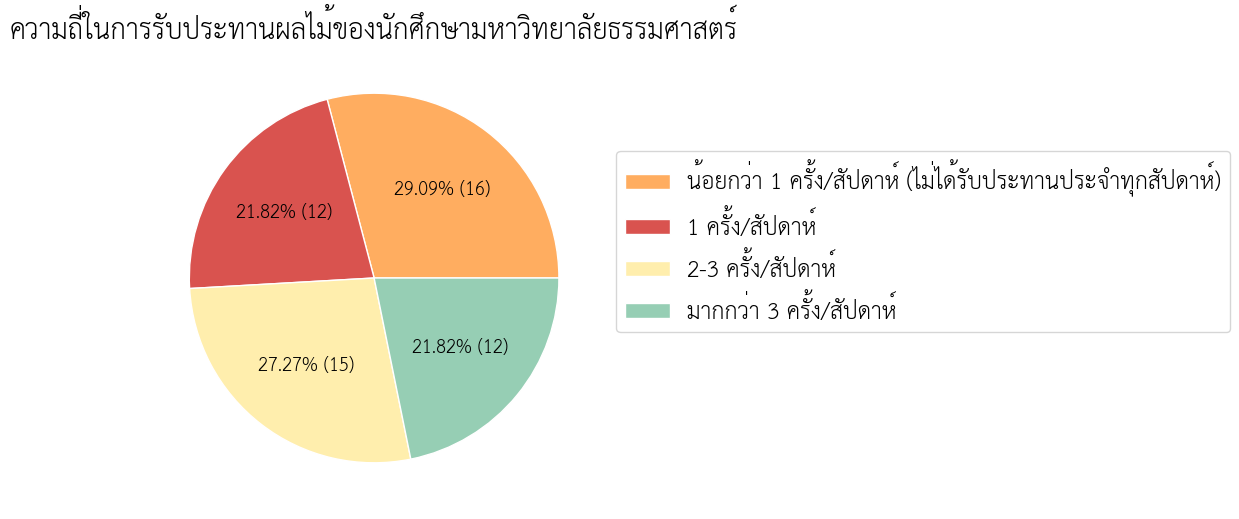

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(fruit_frequency, labels=fruit_frequency.index, autopct=lambda x: f'{x:.2f}% ({round(x*sum(fruit_frequency)/100)})',
                                   textprops={'color': 'white'}, wedgeprops={'edgecolor': 'white', 'linewidth': 1},
                                   colors=['#FFAD60', '#D9534F', '#FFEEAD', '#96CEB4'])

for autotext in autotexts:
    autotext.set_fontsize(13)
    autotext.set_color('black')

plt.title('ความถี่ในการรับประทานผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์')
plt.legend(bbox_to_anchor=(1, 0.8))
plt.show()

ค่าใช้จ่ายในการซื้อผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์รายสัปดาห์

In [ ]:
weekly_cost = data['ค่าใช้จ่ายในการซื้อผลไม้รายสัปดาห์'].value_counts()

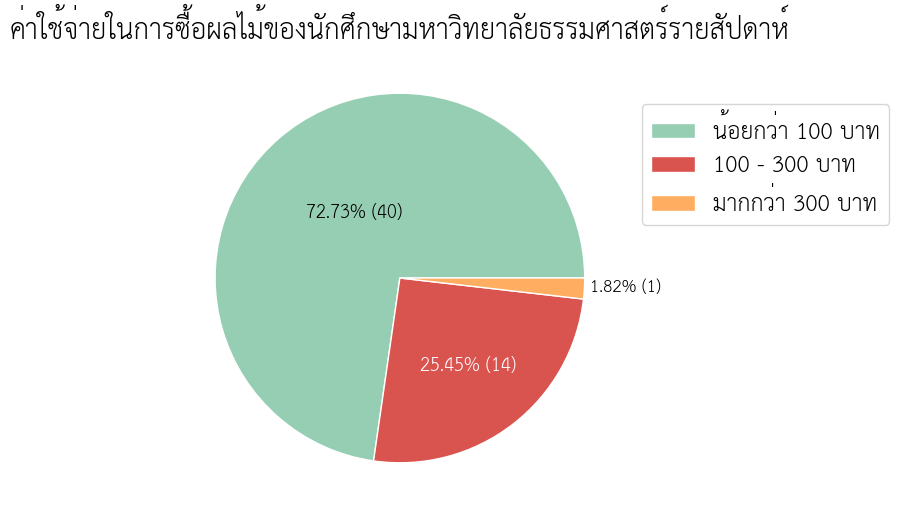

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(weekly_cost, labels=weekly_cost.index, autopct=lambda x: f'{x:.2f}% ({round(x*sum(weekly_cost)/100)})',
                                   textprops={'color': 'white'}, wedgeprops={'edgecolor': 'white', 'linewidth': 1},
                                   colors=['#96CEB4', '#D9534F', '#FFAD60'])

for autotext in autotexts:
    autotext.set_fontsize(13)

autotexts[0].set_position((-0.25, 0.35))
autotexts[0].set_color('black')

autotexts[2].set_position((1.22, -0.05))
autotexts[2].set_fontsize(12)
autotexts[2].set_color('black')

plt.title('ค่าใช้จ่ายในการซื้อผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์รายสัปดาห์')
plt.legend(bbox_to_anchor=(1, 0.9))
plt.show()

อันดับผลไม้ที่นักศึกษามหาวิทยาลัยธรรมศาสตร์ชื่นชอบ

In [ ]:
fruit_favorite = data['คุณชอบรับประทานผลไม้อะไร (เลือกได้มากสุด 3 ข้อ)'].dropna()
fruit_favorite = fruit_favorite.replace('แตงโม, สัปปะรด, ทุเรียน นัมเบอวัน แต่ไม่มีตัง', 'แตงโม, สัปปะรด, ทุเรียน')
fruit_favorite = Counter((','.join(fruit_favorite)).replace(' ','').split(','))
fruit_favorite = pd.Series(fruit_favorite).sort_values()

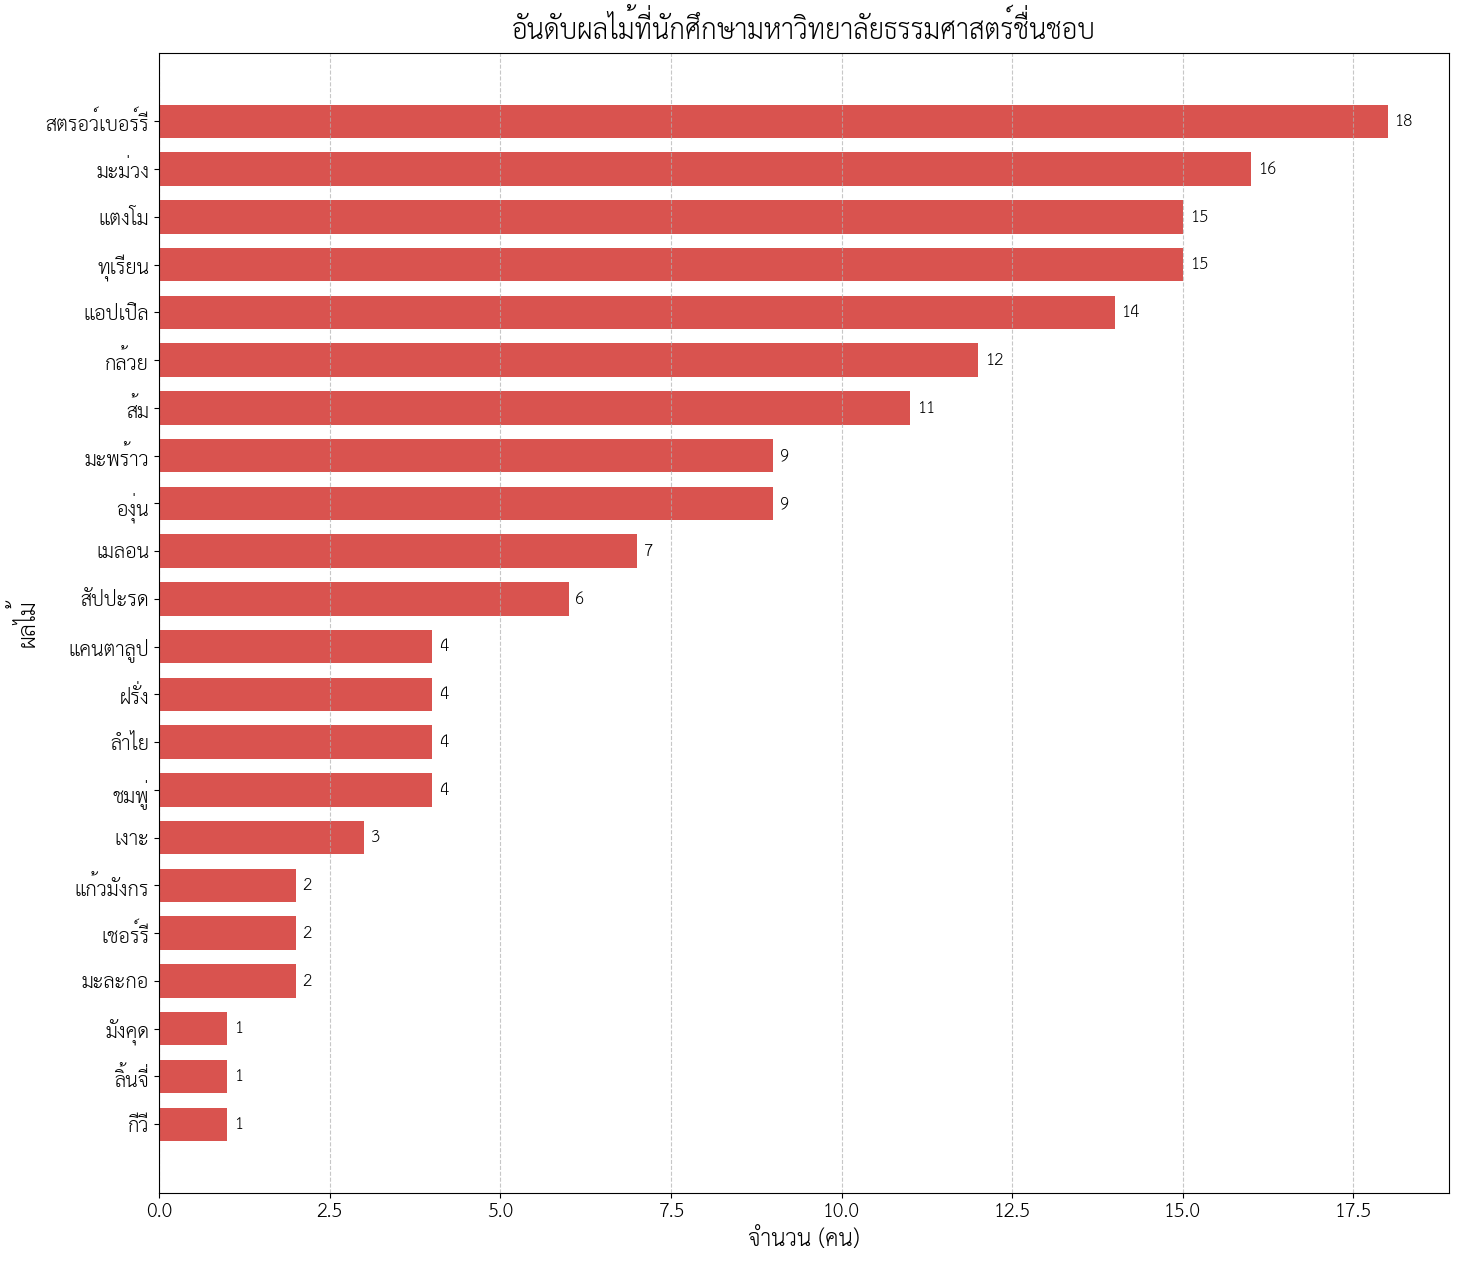

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.barh(fruit_favorite.index, fruit_favorite, height=0.7, color='#D9534F')
ax.tick_params(axis='both', labelsize=14)
fig.subplots_adjust(right=1.2, top=1.25)
ax.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(fruit_favorite):
    ax.text(v+0.1, i, '{:.0f}'.format(v), fontsize=12, ha='left', va='center')

plt.title('อันดับผลไม้ที่นักศึกษามหาวิทยาลัยธรรมศาสตร์ชื่นชอบ', pad=10)
plt.xlabel('จำนวน (คน)')
plt.ylabel('ผลไม้')
plt.show()

อันดับผลไม้ที่นักศึกษามหาวิทยาลัยธรรมศาสตร์ไม่ชอบ

In [ ]:
fruit_disliked = data['คุณไม่ชอบรับประทานผลไม้อะไร (เลือกได้มากสุด 3 ข้อ)'].dropna()
fruit_disliked = Counter((','.join(fruit_disliked)).replace(' ','').split(','))
fruit_disliked = pd.Series(fruit_disliked).sort_values()
fruit_disliked = fruit_disliked.drop('ไม่มีผลไม้ที่ไม่ชอบ')
fruit_disliked = fruit_disliked.drop('ขี้เกียจแกะเปลือกครับ')

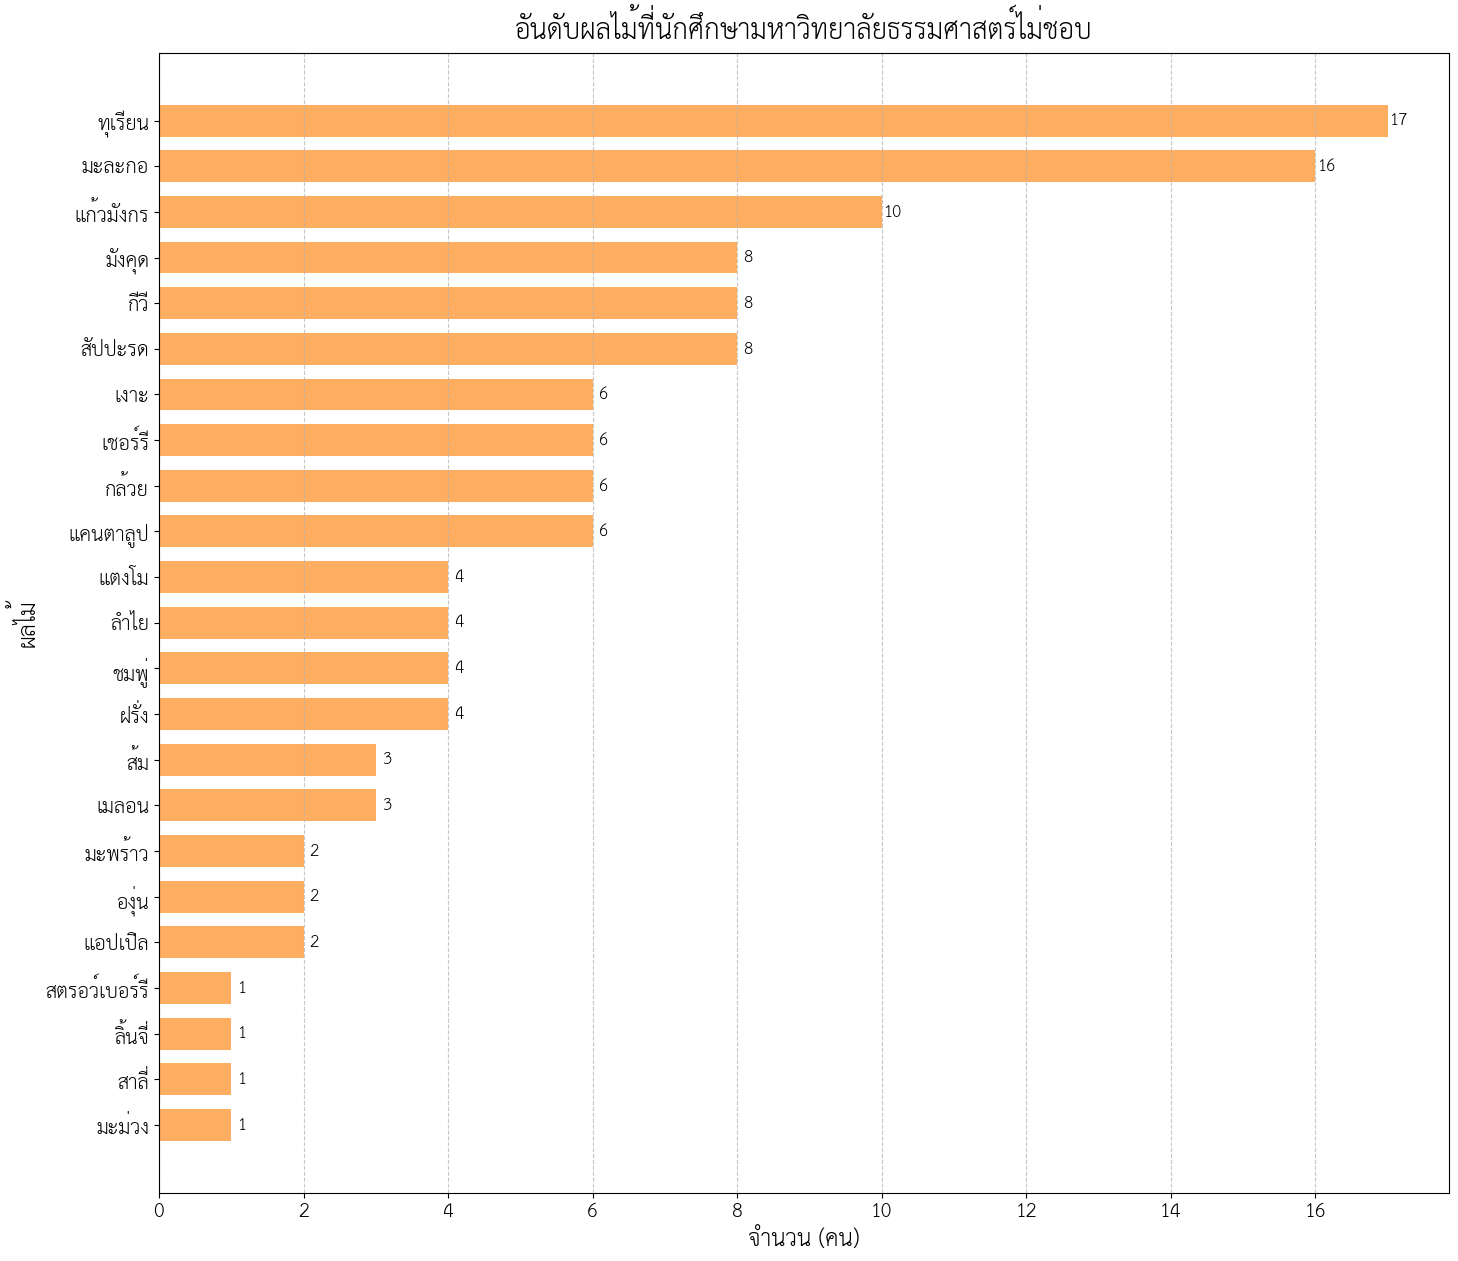

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.barh(fruit_disliked.index, fruit_disliked, height=0.7, color='#FFAD60')
ax.tick_params(axis='both', labelsize=14)
fig.subplots_adjust(right=1.2, top=1.25)
ax.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(fruit_disliked):
    ax.text(v+0.15, i, '{:.0f}'.format(v), fontsize=12, ha='center', va='center')

plt.title('อันดับผลไม้ที่นักศึกษามหาวิทยาลัยธรรมศาสตร์ไม่ชอบ', pad=10)
plt.xlabel('จำนวน (คน)')
plt.ylabel('ผลไม้')
plt.show()

#ตอนที่ 3 : การบริโภคน้ำผลไม้

การดื่มน้ำผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์

In [ ]:
juice_consumption = data['คุณดื่มน้ำผลไม้หรือไม่'].value_counts()

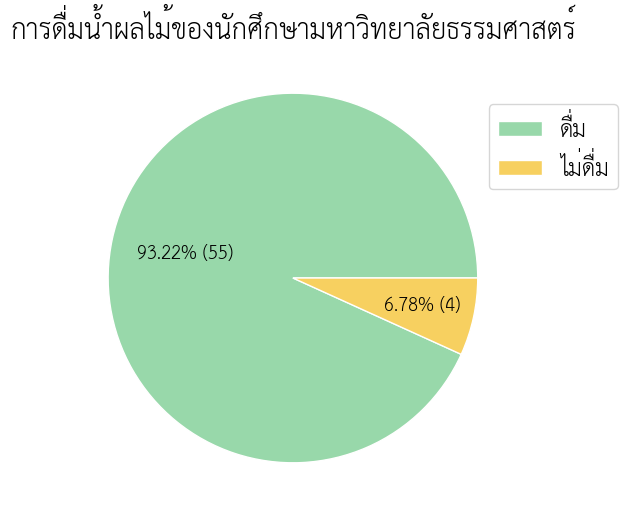

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(juice_consumption, labels=juice_consumption.index, autopct=lambda x: f'{x:.2f}% ({round(x*sum(juice_consumption)/100)})',
                                   textprops={'color': 'white'}, wedgeprops={'edgecolor': 'white', 'linewidth': 1},
                                   colors=['#98D8AA', '#F7D060'])

for autotext in autotexts:
    autotext.set_fontsize(13)
    autotext.set_color('black')

autotexts[1].set_position((0.7, -0.15))

plt.title('การดื่มน้ำผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์')
plt.legend(bbox_to_anchor=(0.9, 0.9))
plt.show()

เหตุผลของการไม่ดื่มน้ำผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์

In [ ]:
juice_reason = data['เหตุผลที่คุณไม่ดื่มน้ำผลไม้ (เลือกได้มากกว่า 1 ข้อ)'].dropna()
juice_reason = Counter(','.join(juice_reason).replace(' ','').split(','))
juice_reason = pd.Series(juice_reason).sort_values()

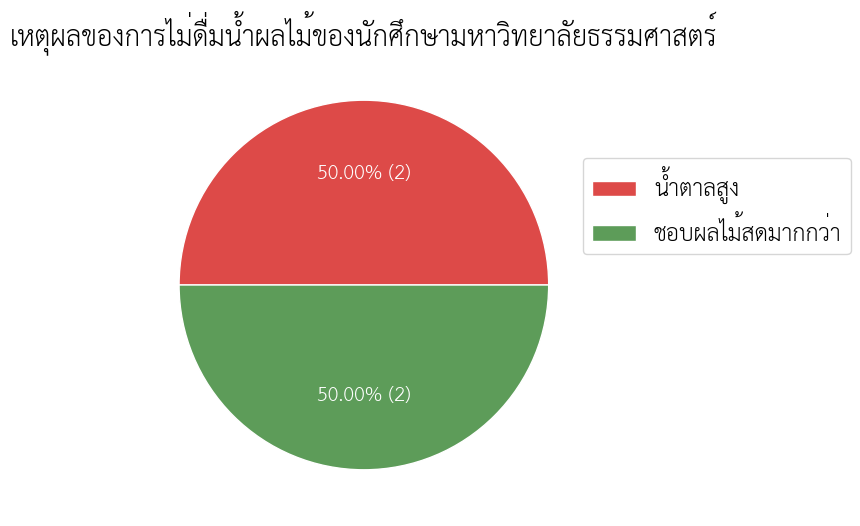

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(juice_reason, labels=juice_reason.index, autopct=lambda x: f'{x:.2f}% ({round(x*sum(juice_reason)/100)})',
                                   textprops={'color': 'white'}, wedgeprops={'edgecolor': 'white', 'linewidth': 1},
                                   colors=['#DD4A48', '#5D9C59'])

for autotext in autotexts:
    autotext.set_fontsize(14)

plt.title('เหตุผลของการไม่ดื่มน้ำผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์')
plt.legend(bbox_to_anchor=(0.95, 0.8))
plt.show()

รูปแบบน้ำผลไม้ที่นักศึกษามหาวิทยาลัยธรรมศาสตร์ชื่นชอบ

In [ ]:
juice_type = data['คุณชอบดื่มน้ำผลไม้ในรูปแบบใดมากที่สุด'].value_counts()
juice_type = juice_type.drop('ผลไม้ที่มากับชาเขียว เช่น ชาเขียวสตอเบอรี่')

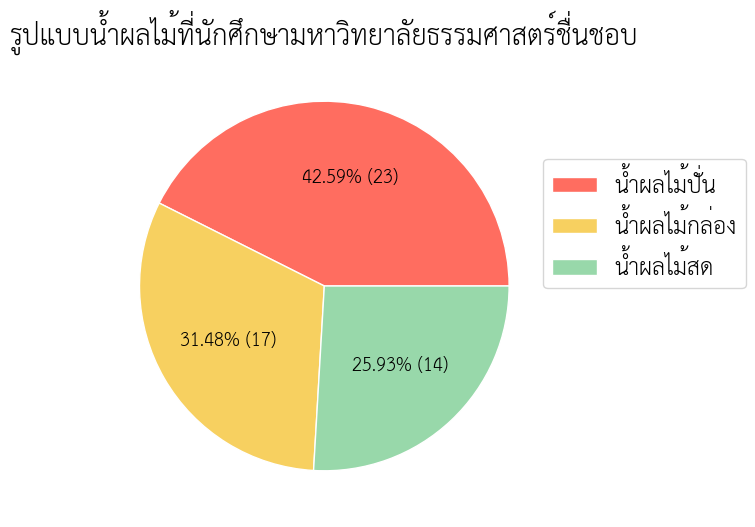

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(juice_type, labels=juice_type.index, autopct=lambda x: f'{x:.2f}% ({round(x*sum(juice_type)/100)})',
                                   textprops={'color': 'white'}, wedgeprops={'edgecolor': 'white', 'linewidth': 1},
                                   colors=['#FF6D60', '#F7D060', '#98D8AA'])

for autotext in autotexts:
    autotext.set_fontsize(13)
    autotext.set_color('black')

plt.title('รูปแบบน้ำผลไม้ที่นักศึกษามหาวิทยาลัยธรรมศาสตร์ชื่นชอบ')
plt.legend(bbox_to_anchor=(0.95, 0.8))
plt.show()

ความถี่ในการดื่มน้ำผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์

In [ ]:
juice_freqency = data['คุณดื่มน้ำผลไม้บ่อยแค่ไหน'].value_counts()
juice_freqency = juice_freqency.reindex(['น้อยกว่า 1 ครั้ง/สัปดาห์ (ไม่ได้ดื่มประจำทุกสัปดาห์)', '1 ครั้ง/สัปดาห์', '2-3 ครั้ง/สัปดาห์', 'มากกว่า 3 ครั้ง/สัปดาห์'])

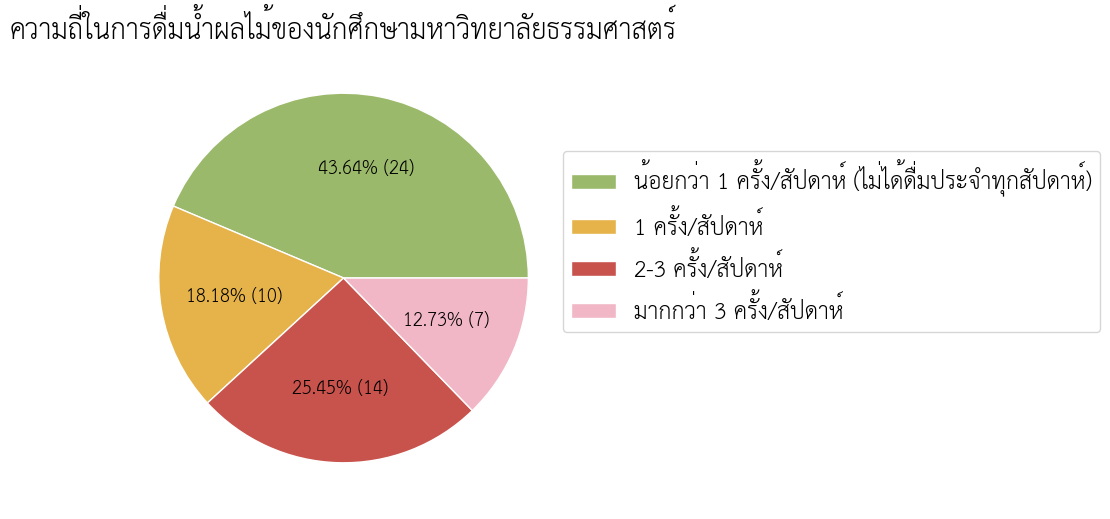

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(juice_freqency, labels=juice_freqency.index, autopct=lambda x: f'{x:.2f}% ({round(x*sum(juice_freqency)/100)})',
                                   textprops={'color': 'white'}, wedgeprops={'edgecolor': 'white', 'linewidth': 1},
                                   colors=['#9BB96B', '#E5B34A', '#C8534C', '#F1B7C6'])

for autotext in autotexts:
    autotext.set_fontsize(13)
    autotext.set_color('black')

plt.title('ความถี่ในการดื่มน้ำผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์')
plt.legend(bbox_to_anchor=(0.95, 0.8))
plt.show()

#ตอนที่ 4 : การบริโภคขนมจากผลไม้

การรับประทานขนมจากผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์

In [ ]:
snack_consumption = data['คุณรับประทานทานขนมที่ทำมาจากผลไม้หรือไม่ (เช่น ไอศกรีม, โยเกิร์ต, พาย, ผลไม้อบแห้ง)'].value_counts()

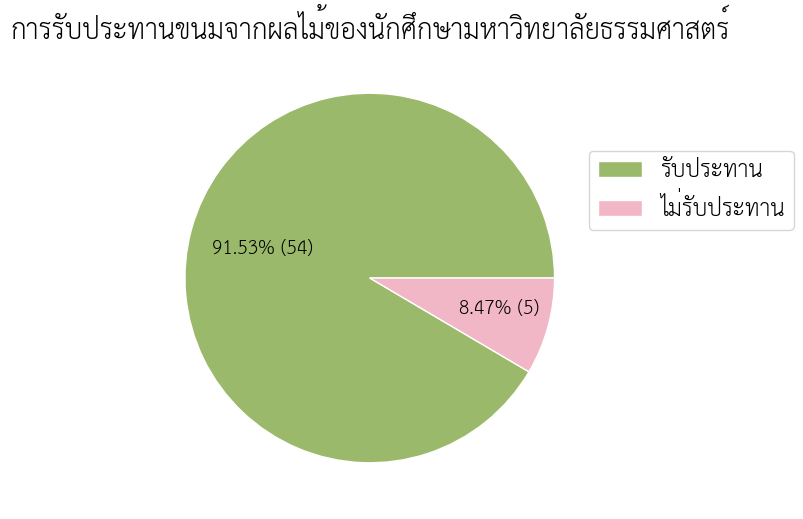

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(snack_consumption, labels=snack_consumption.index, autopct=lambda x: f'{x:.2f}% ({round(x*sum(snack_consumption)/100)})',
                                   textprops={'color': 'white'}, wedgeprops={'edgecolor': 'white', 'linewidth': 1},
                                   colors=['#9BB96B', '#F1B7C6'])

for autotext in autotexts:
    autotext.set_fontsize(13.5)
    autotext.set_color('black')

autotexts[1].set_position((0.7, -0.17))

plt.title('การรับประทานขนมจากผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์')
plt.legend(bbox_to_anchor=(0.95, 0.8))
plt.show()

เหตุผลของการไม่รับประทานขนมจากผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์

In [ ]:
snack_reason = data['เหตุผลที่คุณไม่รับประทานขนมจากผลไม้'].dropna()
snack_reason = Counter(','.join(snack_reason).replace(' ','').split(','))
snack_reason = pd.Series(snack_reason).sort_values()

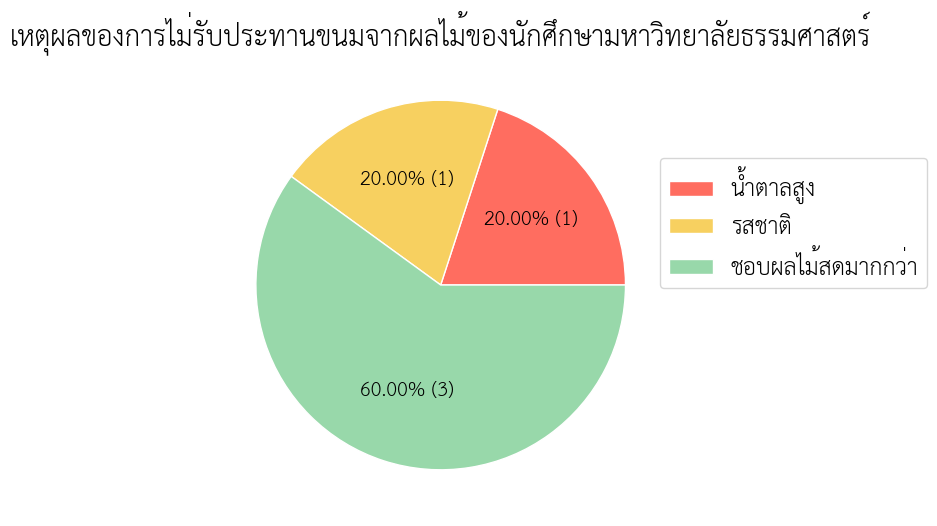

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(snack_reason, labels=snack_reason.index, autopct=lambda x: f'{x:.2f}% ({round(x*sum(snack_reason)/100)})',
                                   textprops={'color': 'white'}, wedgeprops={'edgecolor': 'white', 'linewidth': 1},
                                   colors=['#FF6D60','#F7D060','#98D8AA'])

for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_color('black')

plt.title('เหตุผลของการไม่รับประทานขนมจากผลไม้ของนักศึกษามหาวิทยาลัยธรรมศาสตร์')
plt.legend(bbox_to_anchor=(0.95, 0.8))
plt.show()

อันดับขนมจากผลไม้ที่นักศึกษามหาวิทยาลัยธรรมศาสตร์ชื่นชอบ

In [ ]:
snack_favorite = data['คุณชอบรับประทานขนมจากผลไม้ชนิดใดบ้าง (เลือกได้มากสุด 3 ข้อ)'].dropna()
snack_favorite = Counter((','.join(snack_favorite)).replace(' ','').split(','))
snack_favorite = pd.Series(snack_favorite).sort_values()
snack_favorite = snack_favorite.drop('ขอแค่อร่อยครับ')

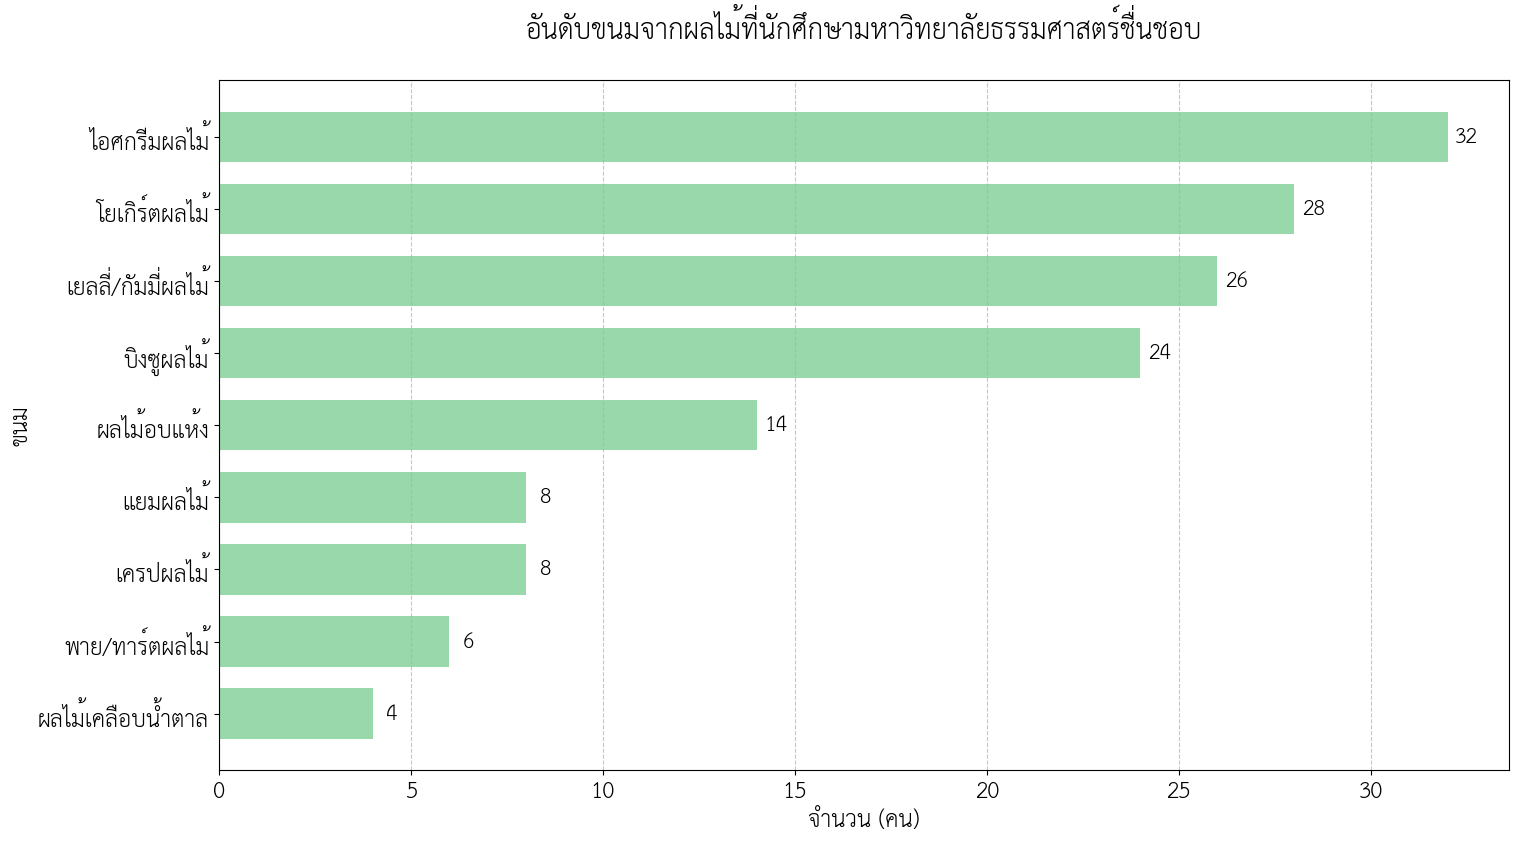

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.barh(snack_favorite.index, snack_favorite, height=0.7, color='#98D8AA')
fig.subplots_adjust(right=1.2, top=0.8)
ax.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(snack_favorite):
    ax.text(v+0.5, i, '{:.0f}'.format(v), fontsize=15, ha='center', va='center')

plt.title('อันดับขนมจากผลไม้ที่นักศึกษามหาวิทยาลัยธรรมศาสตร์ชื่นชอบ', pad=30)
plt.xlabel('จำนวน (คน)')
plt.ylabel('ขนม')
plt.show()

อันดับผลไม้อบแห้งที่นักศึกษามหาวิทยาลัยธรรมศาสตร์ชื่นชอบ

In [ ]:
driedfruit_favorite = data['คุณชอบรับประทานผลไม้อบแห้งจากผลไม้ชนิดไหนมากที่สุด'].value_counts().sort_values()
driedfruit_favorite = driedfruit_favorite.drop('ไม่รับประทานผลไม้อบแห้ง')
driedfruit_favorite = driedfruit_favorite.drop('อร่อยก็กินหมดอ่ะครับ')

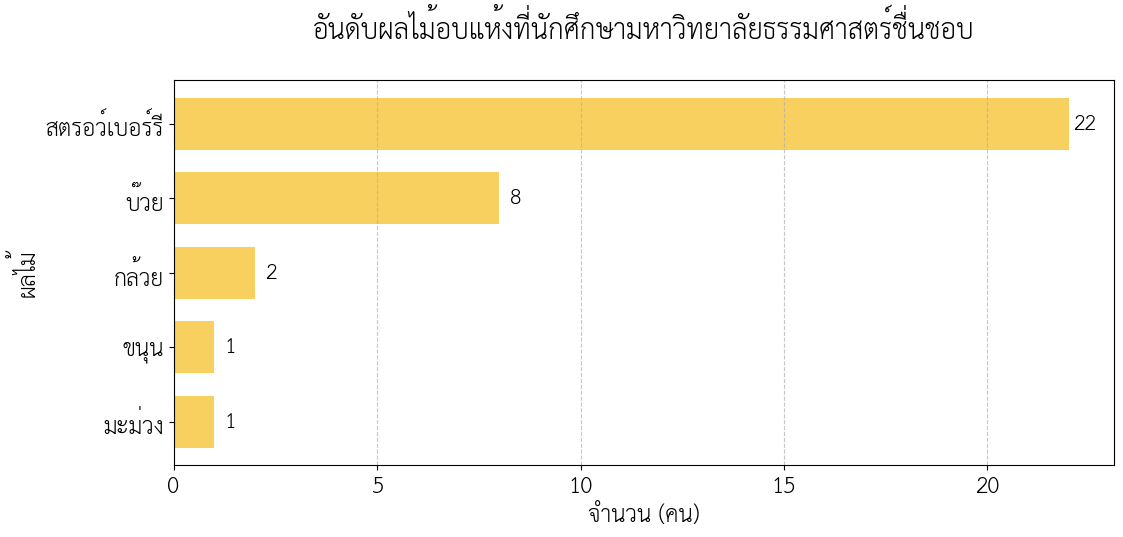

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(driedfruit_favorite.index, driedfruit_favorite, height=0.7, color='#F7D060')
fig.subplots_adjust(right=1.3)
ax.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(driedfruit_favorite):
    ax.text(v+0.4, i, '{:.0f}'.format(v), fontsize=15, ha='center', va='center')

plt.title('อันดับผลไม้อบแห้งที่นักศึกษามหาวิทยาลัยธรรมศาสตร์ชื่นชอบ', pad=30)
plt.xlabel('จำนวน (คน)')
plt.ylabel('ผลไม้')
plt.show()

อันดับโยเกิร์ตผลไม้ที่นักศึกษามหาวิทยาลัยธรรมศาสตร์ชื่นชอบ

In [ ]:
yogurt_favorite = data['คุณชอบรับประทานโยเกิร์ตผลไม้จากผลไม้ชนิดไหนมากที่สุด'].value_counts().sort_values()
yogurt_favorite = yogurt_favorite.drop('ไม่รับประทานโยเกิร์ตผลไม้')
yogurt_favorite = yogurt_favorite.drop('อันนี้ยังเคยลองแค่สตอเบอรี่')

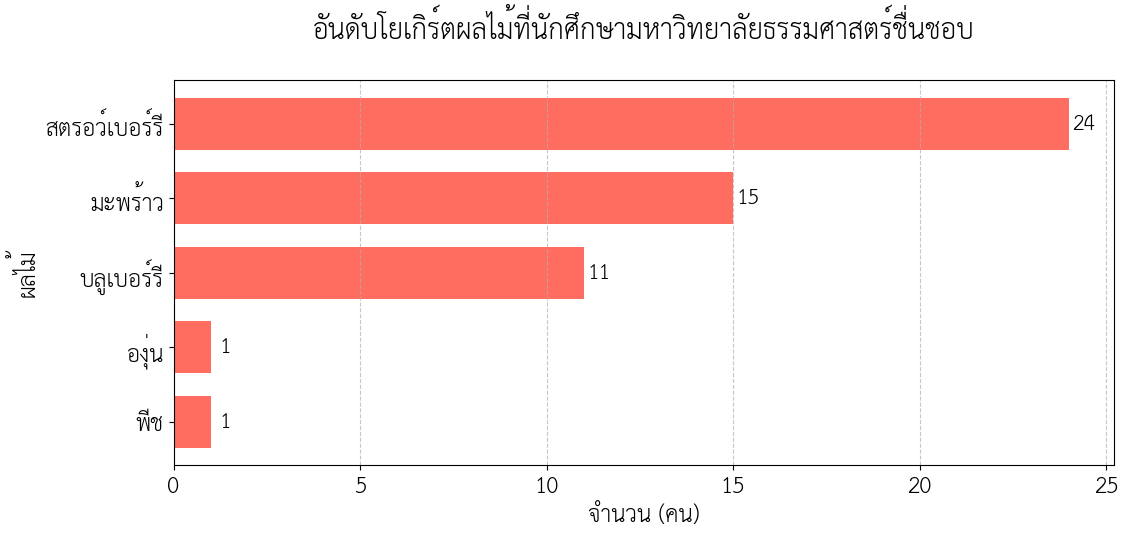

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(yogurt_favorite.index, yogurt_favorite, height=0.7, color='#FF6D60')
fig.subplots_adjust(right=1.3)
ax.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(yogurt_favorite):
    ax.text(v+0.4, i, '{:.0f}'.format(v), fontsize=15, ha='center', va='center')

plt.title('อันดับโยเกิร์ตผลไม้ที่นักศึกษามหาวิทยาลัยธรรมศาสตร์ชื่นชอบ', pad=30)
plt.xlabel('จำนวน (คน)')
plt.ylabel('ผลไม้')
plt.show()

อันดับไอศกรีมผลไม้ที่นักศึกษามหาวิทยาลัยธรรมศาสตร์ชื่นชอบ

In [ ]:
icecream_favorite = data['คุณชอบรับประทานไอศกรีมผลไม้จากผลไม้ชนิดไหนมากที่สุด'].value_counts().sort_values()
icecream_favorite = icecream_favorite.drop('ไม่รับประทานไอศกรีมผลไม้')
icecream_favorite = icecream_favorite.drop('ทั้งหมดที่ว่ามาแหละครับ ถ้ามันอร่อย')

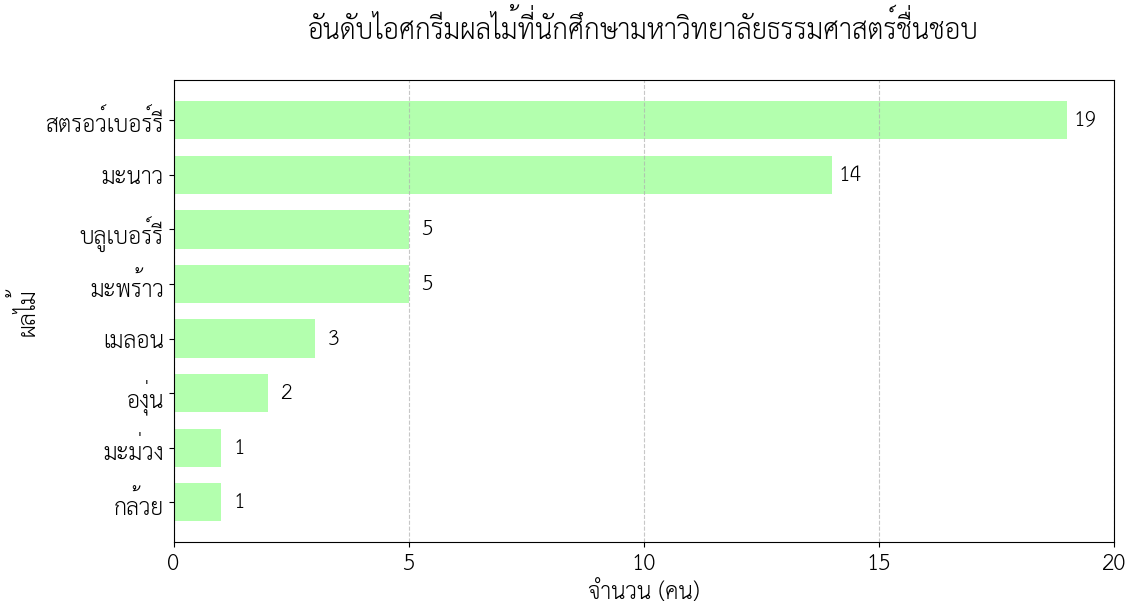

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(icecream_favorite.index, icecream_favorite, height=0.7, color='#B3FFAE')
fig.subplots_adjust(right=1.3)
ax.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(icecream_favorite):
    ax.text(v+0.4, i, '{:.0f}'.format(v), fontsize=15, ha='center', va='center')

plt.title('อันดับไอศกรีมผลไม้ที่นักศึกษามหาวิทยาลัยธรรมศาสตร์ชื่นชอบ', pad=30)
plt.xlabel('จำนวน (คน)')
plt.ylabel('ผลไม้')
ax.set_xticks([0, 5, 10, 15, 20])
plt.show()